## **TML Assignment 4 - Task-1: Network Dissection**


## **Ahrar Bin Aslam and Muhammad Mubeen Siddiqui - Team 16**

## **Clone the CLIP-Dissect Repository**


In [2]:
# Clone CLIP-dissect repository and move into it
!git clone https://github.com/Trustworthy-ML-Lab/CLIP-dissect.git
%cd CLIP-dissect

Cloning into 'CLIP-dissect'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 104 (delta 12), reused 14 (delta 8), pack-reused 80 (from 1)
Receiving objects: 100% (104/104), 15.94 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (33/33), done.
/kaggle/working/CLIP-dissect


## **Install Required Dependencies**


In [3]:
# Install required libraries
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-0m2iclyi
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-0m2iclyi
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 

## **Download Places 365 Model and Broaden Dataset**


In [8]:
# Download Places365 model
!mkdir -p data
!wget -O data/resnet18_places365.pth.tar http://places2.csail.mit.edu/models_places365/resnet18_places365.pth.tar

# Download Broden dataset
!bash dlbroden.sh

--2025-07-20 09:56:18--  http://places2.csail.mit.edu/models_places365/resnet18_places365.pth.tar
Resolving places2.csail.mit.edu (places2.csail.mit.edu)... 128.52.132.120
Connecting to places2.csail.mit.edu (places2.csail.mit.edu)|128.52.132.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45506139 (43M) [application/x-tar]
Saving to: ‘data/resnet18_places365.pth.tar’

data/resnet18_place 100%[===================>]  43.40M  45.5MB/s    in 1.0s    

2025-07-20 09:56:19 (45.5 MB/s) - ‘data/resnet18_places365.pth.tar’ saved [45506139/45506139]



## **Running Neuron Dissection on Restnet18_Places**


In [9]:
# Dissect ResNet18 Places365
!python describe_neurons.py \
  --target_model resnet18_places \
  --target_layers layer2,layer3,layer4 \
  --d_probe broden \
  --concept_set data/20k.txt \
  --device cuda

100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.62it/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|████████████████████████████████████████| 128/128 [00:01<00:00, 113.78it/s]
torch.Size([128, 20000])
100%|████████████████████████████████████████| 256/256 [00:01<00:00, 155.75it/s]
torch.Size([256, 20000])
100%|████████████████████████████████████████| 512/512 [00:03<00:00, 162.40it/s]
torch.Size([512, 20000])


## **Running Neuron Dissection on Restnet18 Imagenet**


In [10]:
# Dissect ResNet18 ImageNet
!python describe_neurons.py \
    --target_model resnet18 \
    --target_layers layer2,layer3,layer4 \
    --d_probe broden \
    --concept_set data/20k.txt \
    --device cuda

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|███████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 148MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|████████████████████████████████████████| 128/128 [00:00<00:00, 139.97it/s]
torch.Size([128, 20000])
100%|████████████████████████████████████████| 256/256 [00:01<00:00, 157.54it/s]
torch.Size([256, 20000])
100%|████████████████████████████████████████| 512/512 [00:03<00:00, 160.17it/s]
torch.Size([512, 20000])


## **Data Analysis and Visualization on Resnet18_Places**


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
df = pd.read_csv("results/resnet18_places_25_07_20_10_02/descriptions.csv")

In [17]:
print("Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (896, 4)

Column Data Types:
layer           object
unit             int64
description     object
similarity     float64
dtype: object

Missing values per column:
layer          0
unit           0
description    0
similarity     0
dtype: int64


In [18]:
print("Unique layers:", df['layer'].nunique())
print("Unique concepts (descriptions):", df['description'].nunique())
print("Unique units:", df['unit'].nunique())

Unique layers: 3
Unique concepts (descriptions): 427
Unique units: 512


In [19]:
print("Similarity Score Statistics:")
print(df['similarity'].describe())

Similarity Score Statistics:
count    896.000000
mean       0.258311
std        0.132448
min        0.055908
25%        0.161064
50%        0.230164
75%        0.324783
max        0.844849
Name: similarity, dtype: float64


In [20]:
print("Top 10 Most Frequent Concepts:")
print(df['description'].value_counts().head(10))

Top 10 Most Frequent Concepts:
description
dotted      49
checker     26
textile     23
stripes     13
green       12
stripe      11
grid        11
bathroom    11
kitchen      9
closet       8
Name: count, dtype: int64


In [24]:
print("Top 5 Layers by Neuron Count:")
print(df['layer'].value_counts().head())

Top 5 Layers by Neuron Count:
layer
layer4    512
layer3    256
layer2    128
Name: count, dtype: int64


## **Top 10 Concepts Across All Neurons**


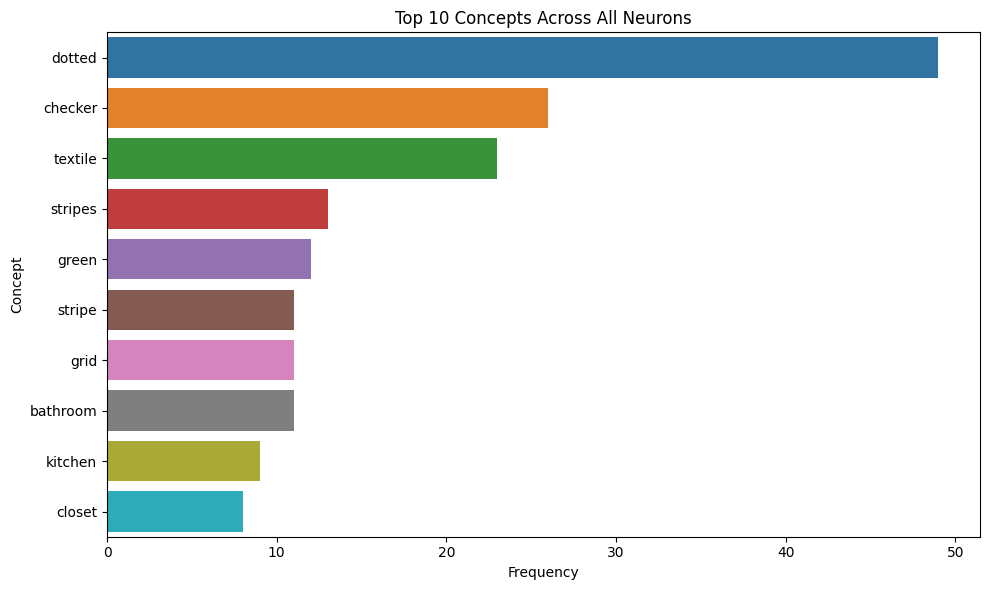

In [13]:
top_10 = df['description'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Concepts Across All Neurons")
plt.xlabel("Frequency")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()

## **Top 20 Concepts Across All Neurons**


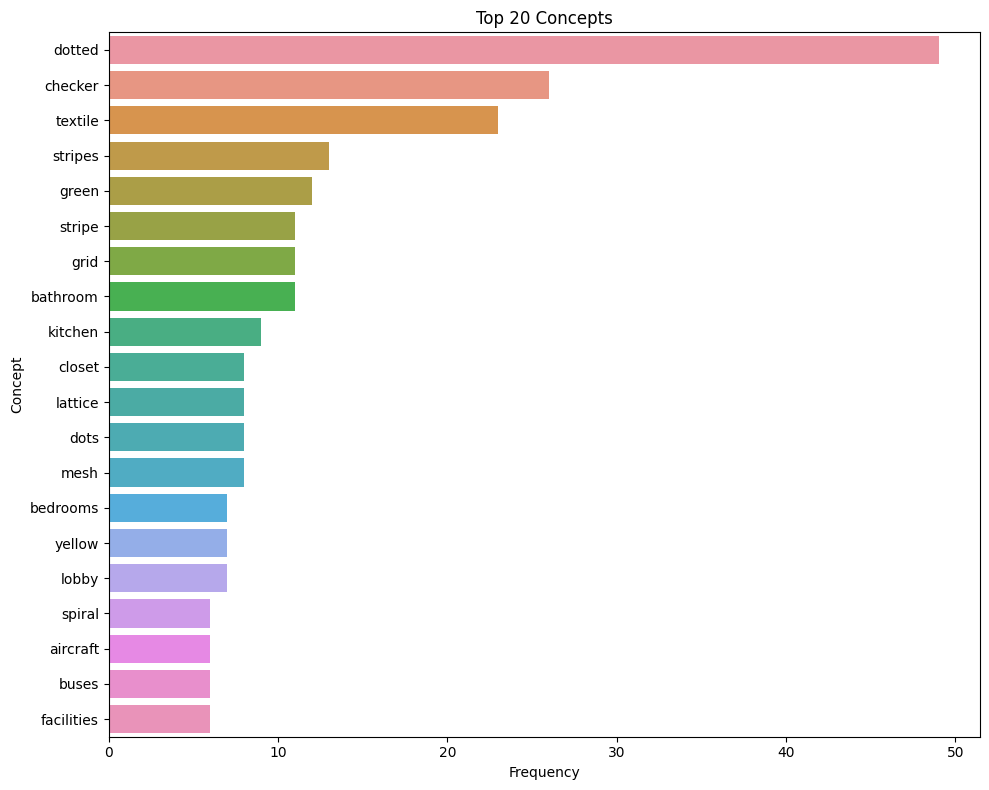

In [93]:
top_20 = df['description'].value_counts().nlargest(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20.values, y=top_20.index, orient='h')
plt.title("Top 20 Concepts")
plt.xlabel("Frequency")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()

## **Unique Concepts per Layer**


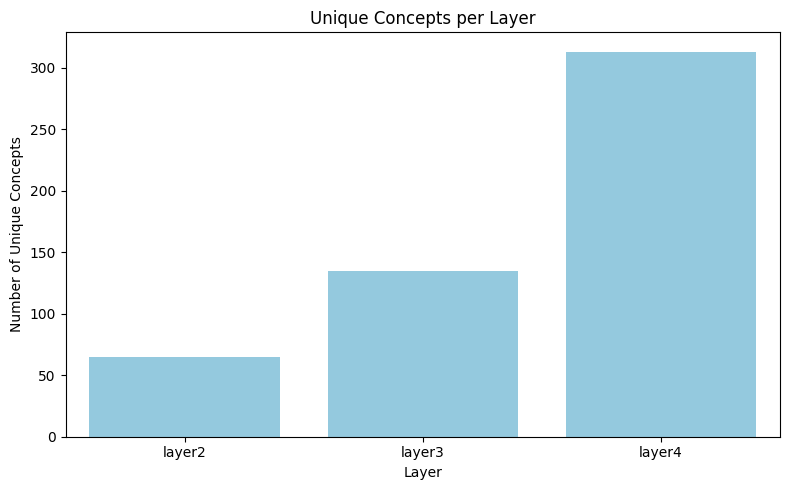

In [61]:
concepts_per_layer = df.groupby('layer')['description'].nunique().reset_index(name='unique_concepts')
plt.figure(figsize=(8, 5))
sns.barplot(data=concepts_per_layer, x='layer', y='unique_concepts', color='skyblue')
plt.title("Unique Concepts per Layer")
plt.ylabel("Number of Unique Concepts")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Neuron Count per Layer**


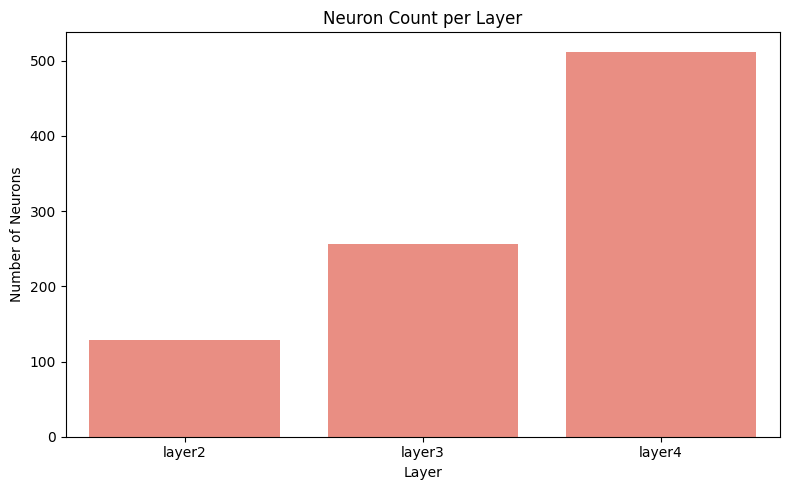

In [62]:
neurons_per_layer = df.groupby('layer')['unit'].count().reset_index(name='neuron_count')
plt.figure(figsize=(8, 5))
sns.barplot(data=neurons_per_layer, x='layer', y='neuron_count', color='salmon')
plt.title("Neuron Count per Layer")
plt.ylabel("Number of Neurons")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Average Similarity Score Per Layer**


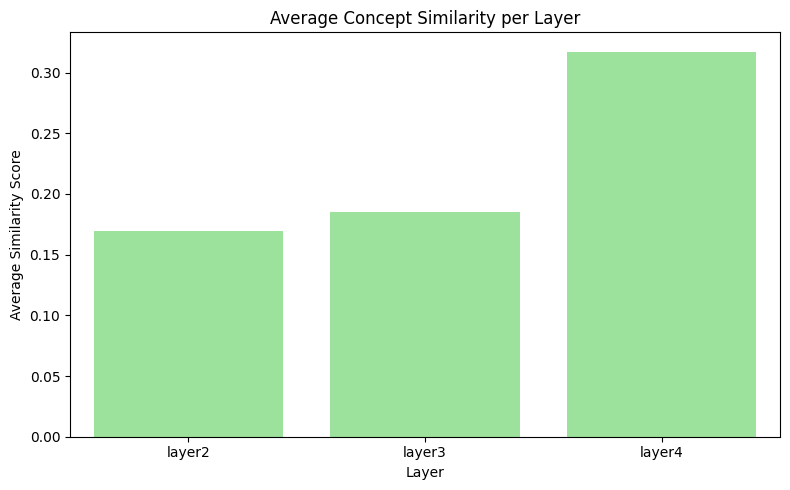

In [63]:
avg_similarity = df.groupby('layer')['similarity'].mean().reset_index(name='avg_similarity')
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_similarity, x='layer', y='avg_similarity', color='lightgreen')
plt.title("Average Concept Similarity per Layer")
plt.ylabel("Average Similarity Score")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Concept Frequency Histogram**


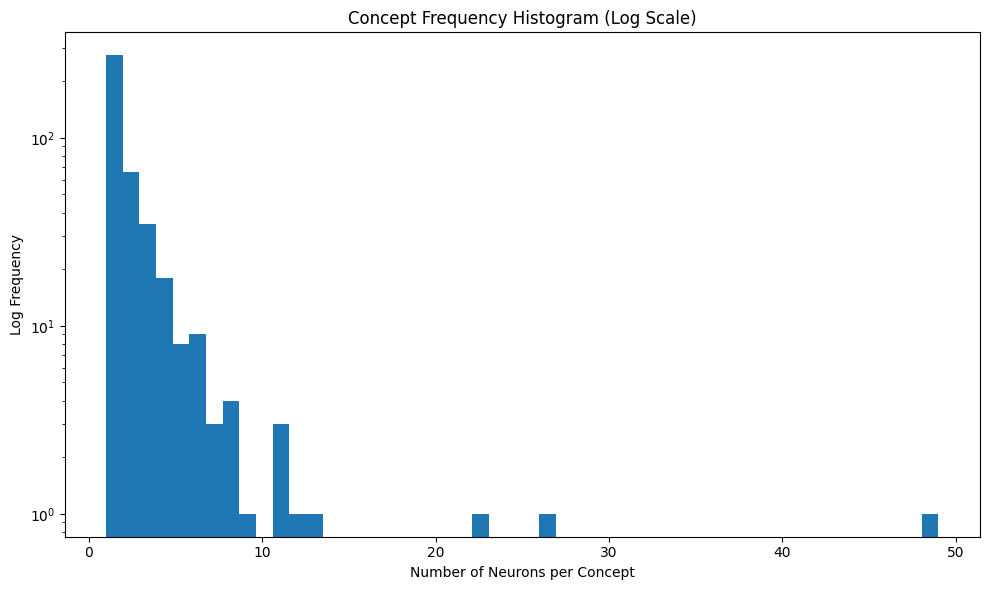

In [23]:
concept_counts = df['description'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(concept_counts.values, bins=50, log=True)
plt.title("Concept Frequency Histogram (Log Scale)")
plt.xlabel("Number of Neurons per Concept")
plt.ylabel("Log Frequency")
plt.tight_layout()
plt.show()

## **Word Cloud**


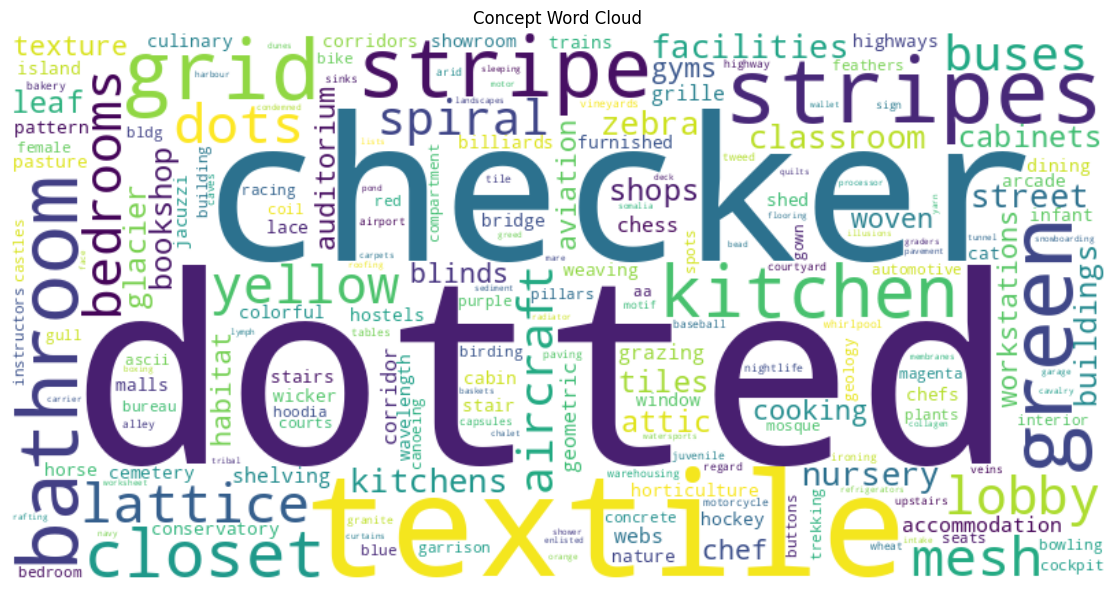

In [25]:
word_freq = df['description'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Concept Word Cloud")
plt.tight_layout()
plt.show()

## **Distribution of Concept Similarity Scores by Layer**


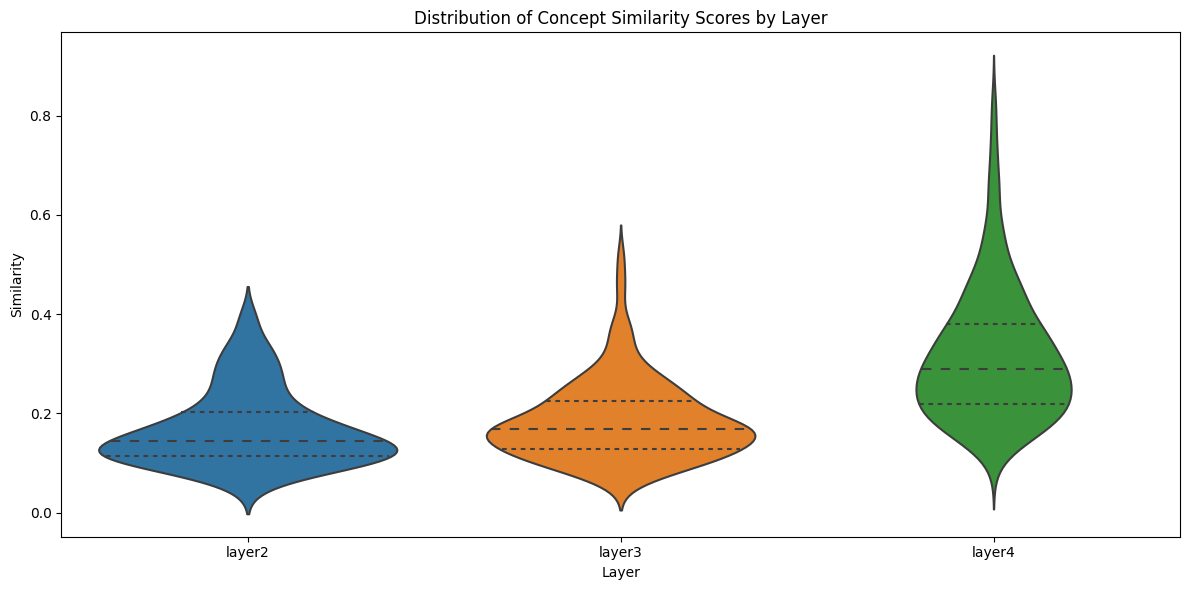

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='layer', y='similarity', data=df, inner='quartile')
plt.title("Distribution of Concept Similarity Scores by Layer")
plt.ylabel("Similarity")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Distribution of Unique Concepts Across Layers**


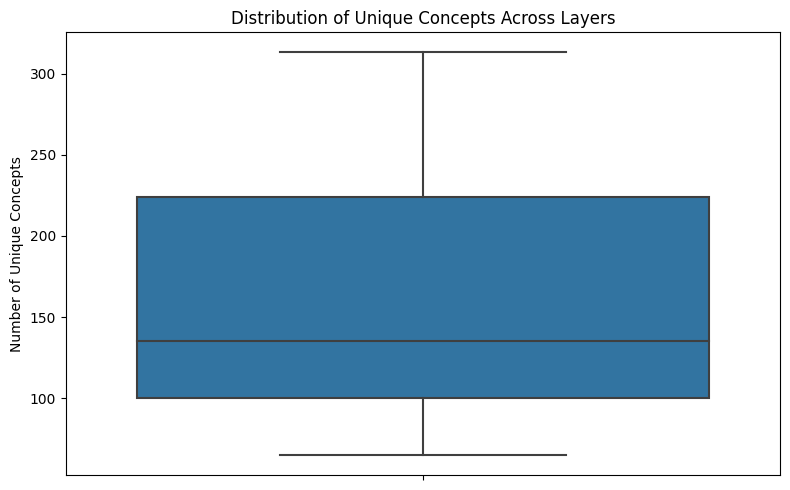

In [28]:
concepts_per_layer = df.groupby('layer')['description'].nunique().reset_index()
plt.figure(figsize=(8, 5))
sns.boxplot(data=concepts_per_layer, y='description')
plt.title("Distribution of Unique Concepts Across Layers")
plt.ylabel("Number of Unique Concepts")
plt.tight_layout()
plt.show()

## **Neuron Similarity by Unit and Layer**


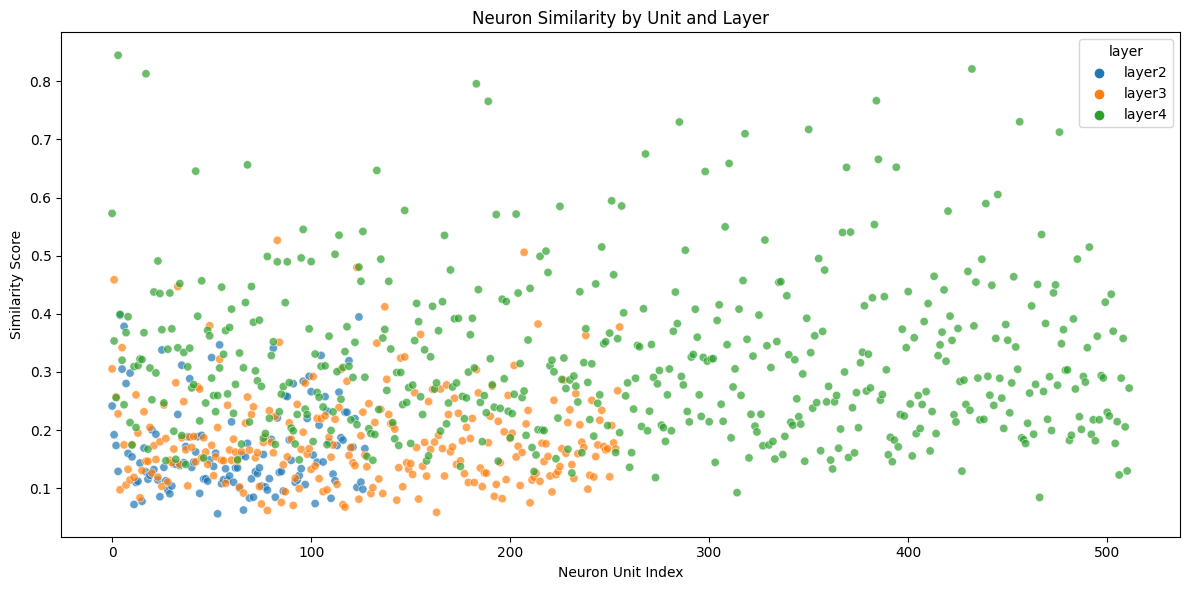

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='unit', y='similarity', hue='layer', palette='tab10', alpha=0.7)
plt.title("Neuron Similarity by Unit and Layer")
plt.xlabel("Neuron Unit Index")
plt.ylabel("Similarity Score")
plt.tight_layout()
plt.show()

## **Heatmap of Top Concepts Across Layers**


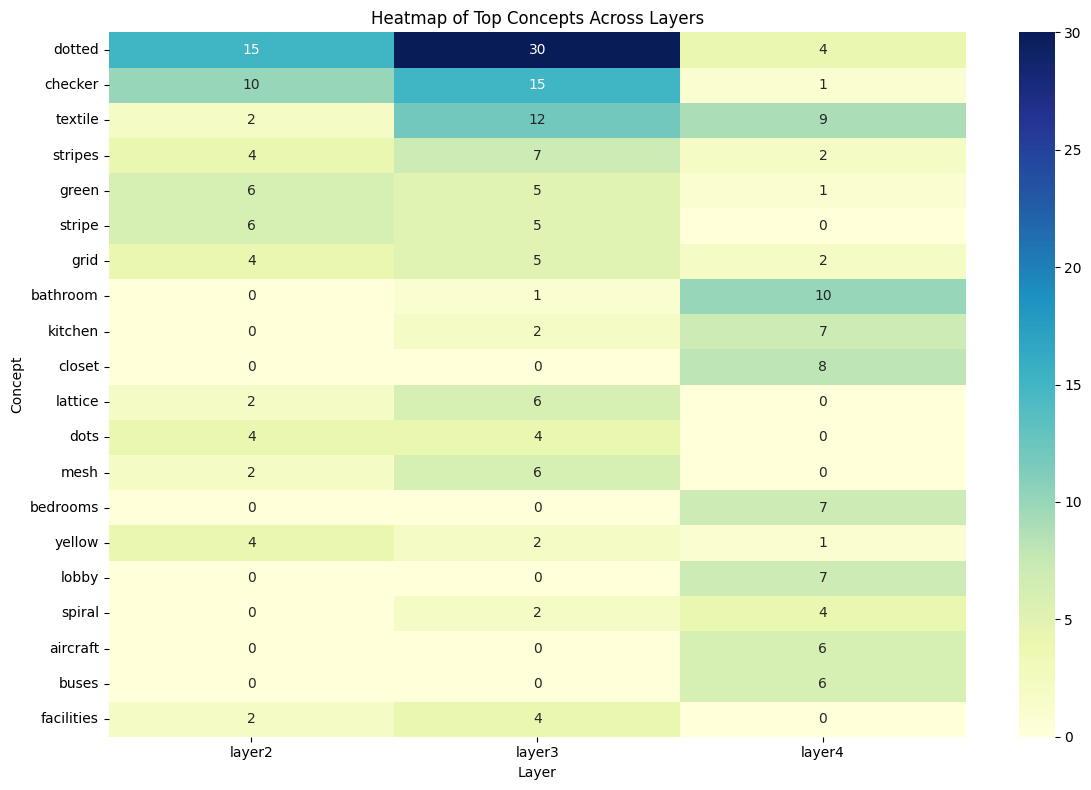

In [30]:
pivot_table = df.pivot_table(index='description', columns='layer', aggfunc='size', fill_value=0)
top_concepts = df['description'].value_counts().head(20).index
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.loc[top_concepts], cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of Top Concepts Across Layers")
plt.xlabel("Layer")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()

## **Resnet18 Imagenet Data Analysis and Visualization**

In [31]:
second_df = pd.read_csv("results/resnet18_25_07_20_10_05/descriptions.csv")


In [47]:
print("Shape:", second_df.shape)
print("\nColumn Data Types:")
print(second_df.dtypes)

# Check for nulls
print("\nMissing values per column:")
print(second_df.isnull().sum())

Shape: (896, 4)

Column Data Types:
layer           object
unit             int64
description     object
similarity     float64
dtype: object

Missing values per column:
layer          0
unit           0
description    0
similarity     0
dtype: int64


In [48]:
print("Unique layers:", second_df['layer'].nunique())
print("Unique concepts (descriptions):", second_df['description'].nunique())
print("Unique units:", second_df['unit'].nunique())

Unique layers: 3
Unique concepts (descriptions): 374
Unique units: 512


In [49]:
print("Similarity Score Statistics:")
print(second_df['similarity'].describe())

Similarity Score Statistics:
count    896.000000
mean       0.220541
std        0.109434
min        0.070953
25%        0.142517
50%        0.191147
75%        0.272659
max        0.765778
Name: similarity, dtype: float64


In [50]:
print("Top 10 Most Frequent Concepts:")
print(second_df['description'].value_counts().head(10))

Top 10 Most Frequent Concepts:
description
dotted      60
textile     23
checker     20
lattice     19
zebra       18
stripe      16
dots        15
grid        13
spiral      13
bedrooms    13
Name: count, dtype: int64


In [51]:
print("Top 5 Layers by Neuron Count:")
print(second_df['layer'].value_counts().head())

Top 5 Layers by Neuron Count:
layer
layer4    512
layer3    256
layer2    128
Name: count, dtype: int64


## **Top 10 Concepts Across All Neurons**

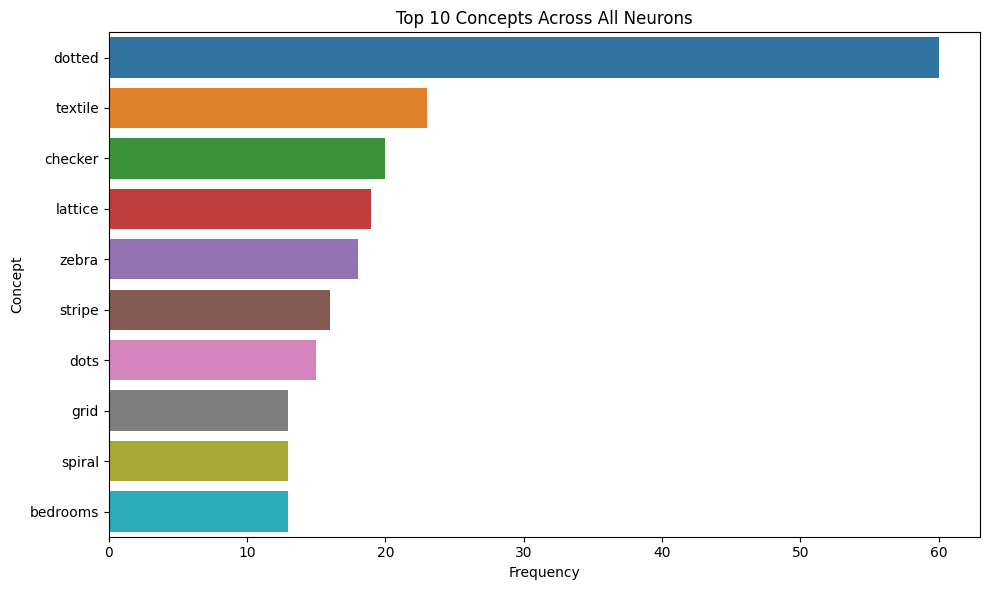

In [52]:
top_10 = second_df['description'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Concepts Across All Neurons")
plt.xlabel("Frequency")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()

## **Top 20 Concepts**

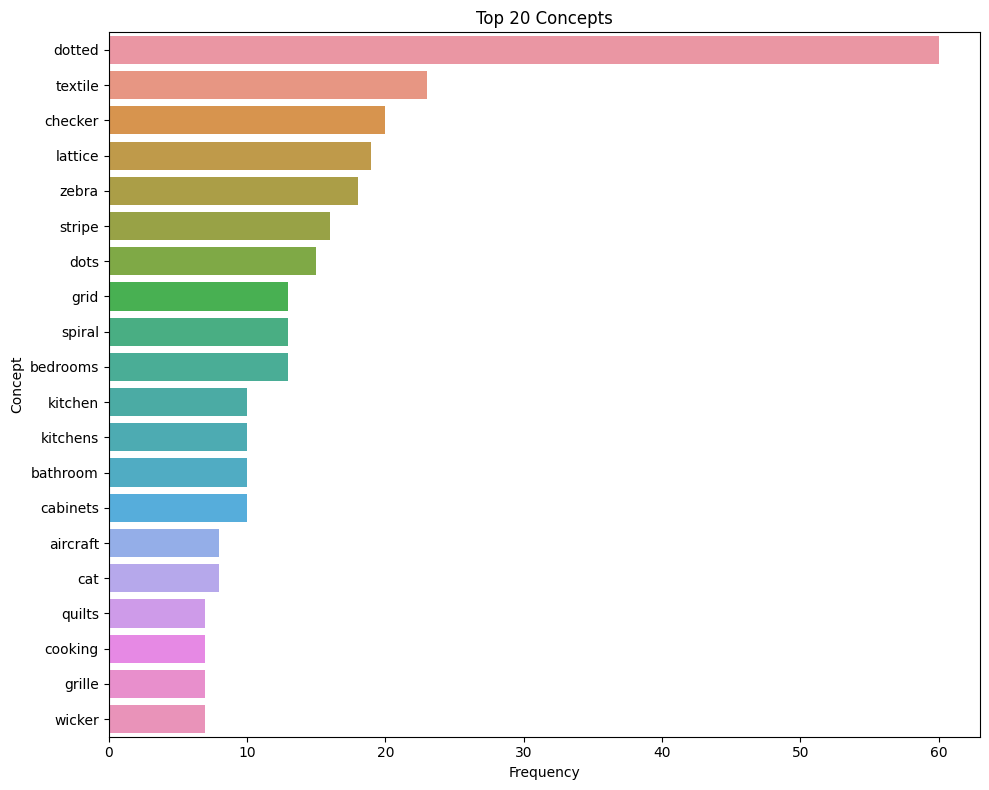

In [53]:
top_20 = second_df['description'].value_counts().nlargest(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20.values, y=top_20.index, orient='h')
plt.title("Top 20 Concepts")
plt.xlabel("Frequency")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()

## **Unique Concepts per Layer**

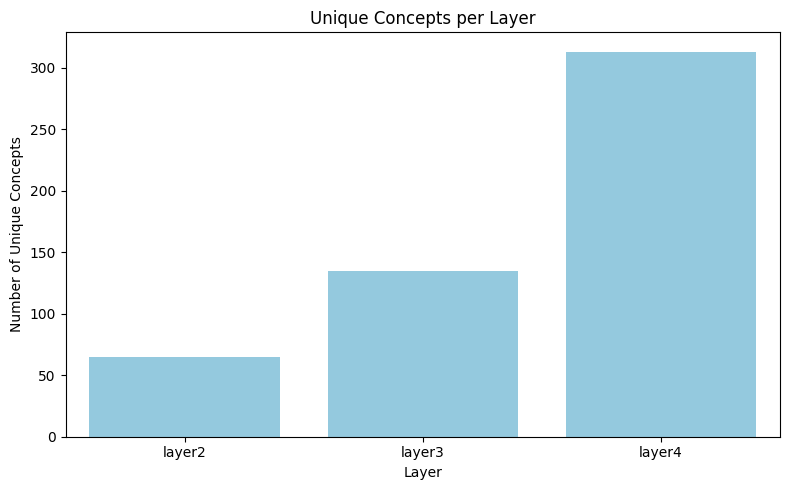

In [65]:
concepts_per_layer = df.groupby('layer')['description'].nunique().reset_index(name='unique_concepts')
plt.figure(figsize=(8, 5))
sns.barplot(data=concepts_per_layer, x='layer', y='unique_concepts', color='skyblue')
plt.title("Unique Concepts per Layer")
plt.ylabel("Number of Unique Concepts")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Neuron Count per Layer**

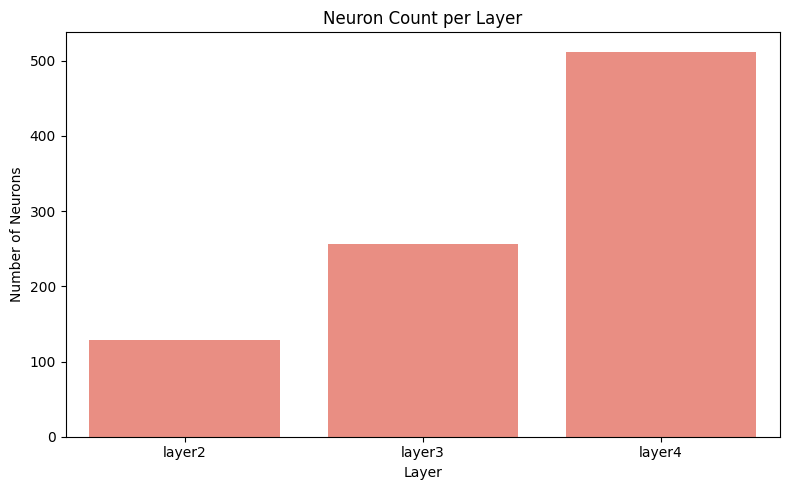

In [67]:
neurons_per_layer = df.groupby('layer')['unit'].count().reset_index(name='neuron_count')
plt.figure(figsize=(8, 5))
sns.barplot(data=neurons_per_layer, x='layer', y='neuron_count', color='salmon')
plt.title("Neuron Count per Layer")
plt.ylabel("Number of Neurons")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Average Concept Similarity per Layer**

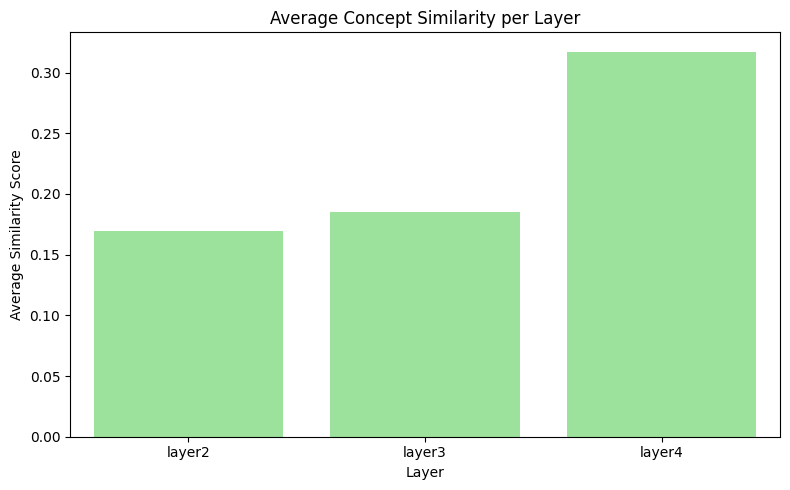

In [69]:
avg_similarity = df.groupby('layer')['similarity'].mean().reset_index(name='avg_similarity')
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_similarity, x='layer', y='avg_similarity', color='lightgreen')
plt.title("Average Concept Similarity per Layer")
plt.ylabel("Average Similarity Score")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Concept Frequency Histogram**

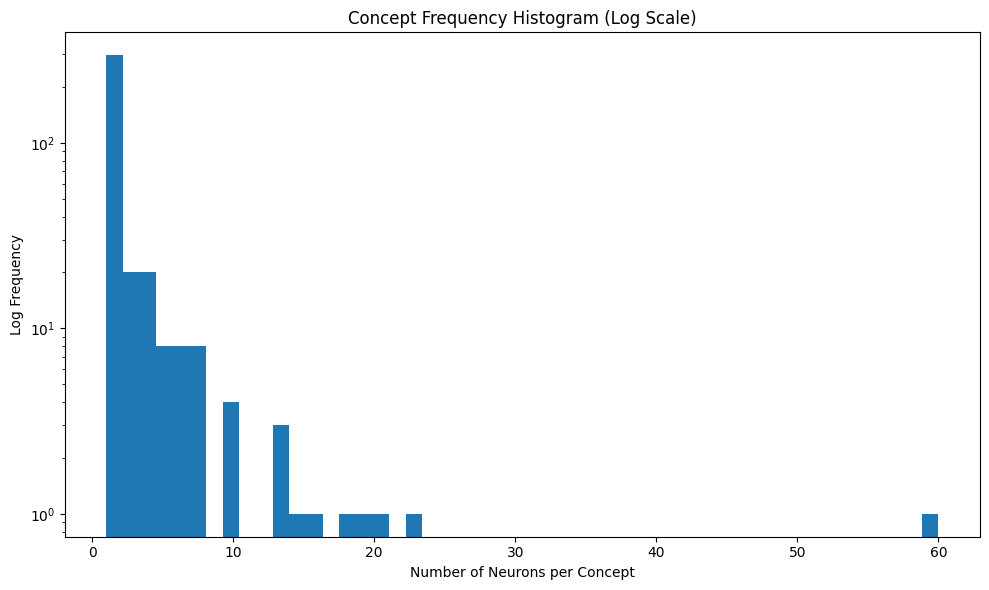

In [54]:
concept_counts = second_df['description'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(concept_counts.values, bins=50, log=True)
plt.title("Concept Frequency Histogram (Log Scale)")
plt.xlabel("Number of Neurons per Concept")
plt.ylabel("Log Frequency")
plt.tight_layout()
plt.show()

## **Word Cloud**

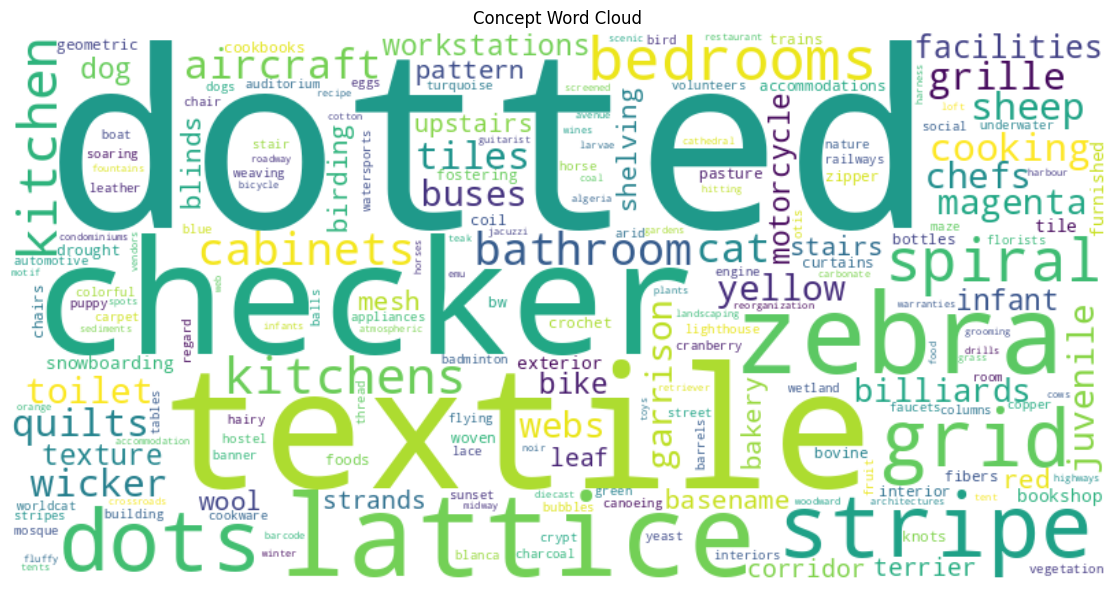

In [55]:
word_freq = second_df['description'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Concept Word Cloud")
plt.tight_layout()
plt.show()

## **Distribution of Concept Similarity Scores by Layer**

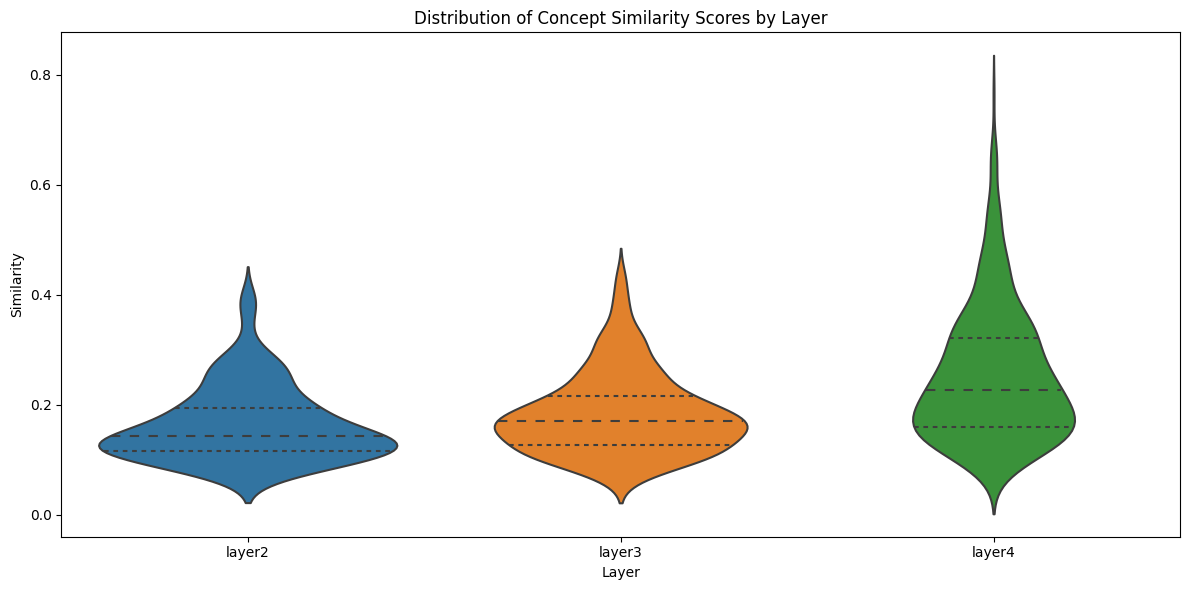

In [56]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='layer', y='similarity', data=second_df, inner='quartile')
plt.title("Distribution of Concept Similarity Scores by Layer")
plt.ylabel("Similarity")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

## **Distribution of Unique Concepts Across Layers**

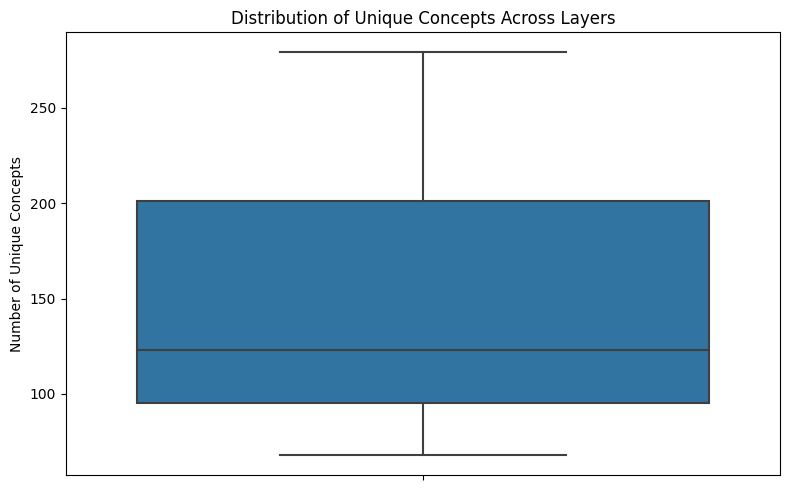

In [57]:
concepts_per_layer = second_df.groupby('layer')['description'].nunique().reset_index()
plt.figure(figsize=(8, 5))
sns.boxplot(data=concepts_per_layer, y='description')
plt.title("Distribution of Unique Concepts Across Layers")
plt.ylabel("Number of Unique Concepts")
plt.tight_layout()
plt.show()

## **Neuron Similarity by Unit and Layer**

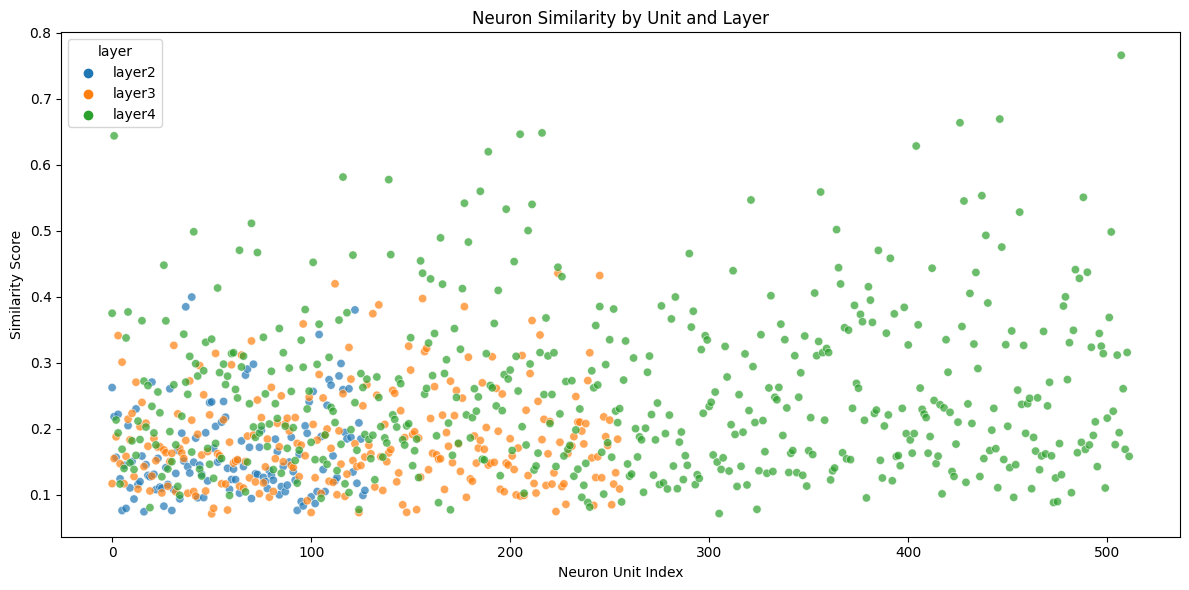

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=second_df, x='unit', y='similarity', hue='layer', palette='tab10', alpha=0.7)
plt.title("Neuron Similarity by Unit and Layer")
plt.xlabel("Neuron Unit Index")
plt.ylabel("Similarity Score")
plt.tight_layout()
plt.show()

## **Heatmap of Top Concepts Across Layers**

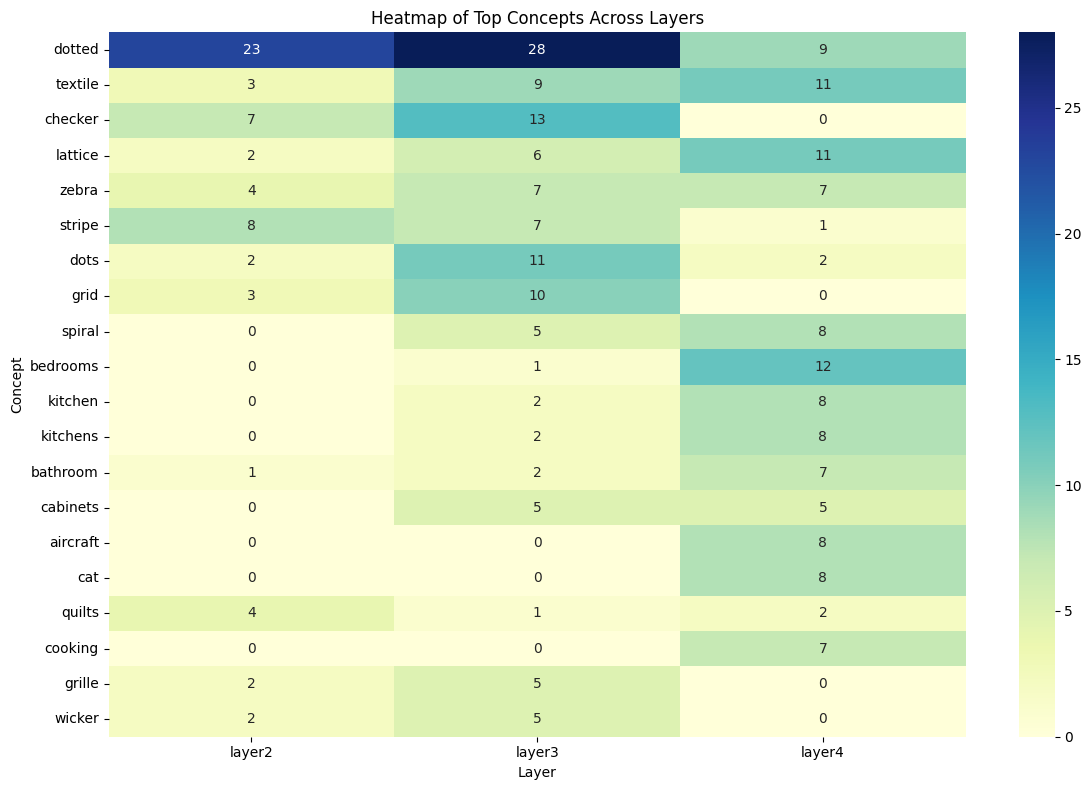

In [59]:
pivot_table = second_df.pivot_table(index='description', columns='layer', aggfunc='size', fill_value=0)
top_concepts = second_df['description'].value_counts().head(20).index
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.loc[top_concepts], cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of Top Concepts Across Layers")
plt.xlabel("Layer")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()

## **Comparision Between the Two Models**

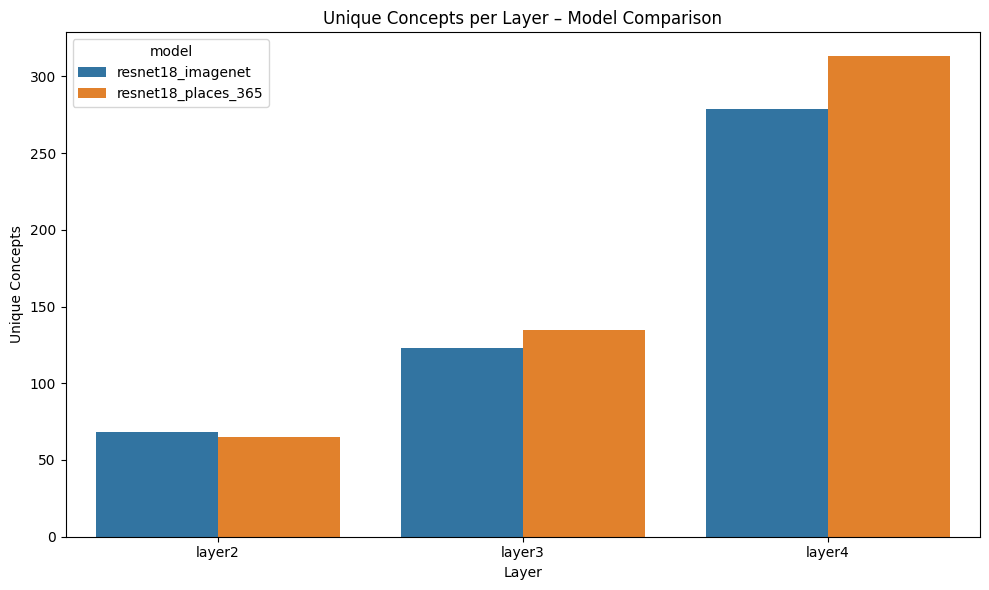

In [79]:
# Load the two models
df1 = pd.read_csv("results/resnet18_places_25_07_20_10_02/descriptions.csv")  # Model 1
df2 = pd.read_csv("results/resnet18_25_07_20_10_05/descriptions.csv")          # Model 2

# Add model labels
df1['model'] = 'resnet18_places_365'
df2['model'] = 'resnet18_imagenet'

# Combine into one dataframe
combined = pd.concat([df1, df2], ignore_index=True)

# Unique Concepts Per Layer
concepts_per_layer = combined.groupby(['model', 'layer'])['description'].nunique().reset_index(name='unique_concepts')
plt.figure(figsize=(10, 6))
sns.barplot(data=concepts_per_layer, x='layer', y='unique_concepts', hue='model')
plt.title("Unique Concepts per Layer – Model Comparison")
plt.ylabel("Unique Concepts")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

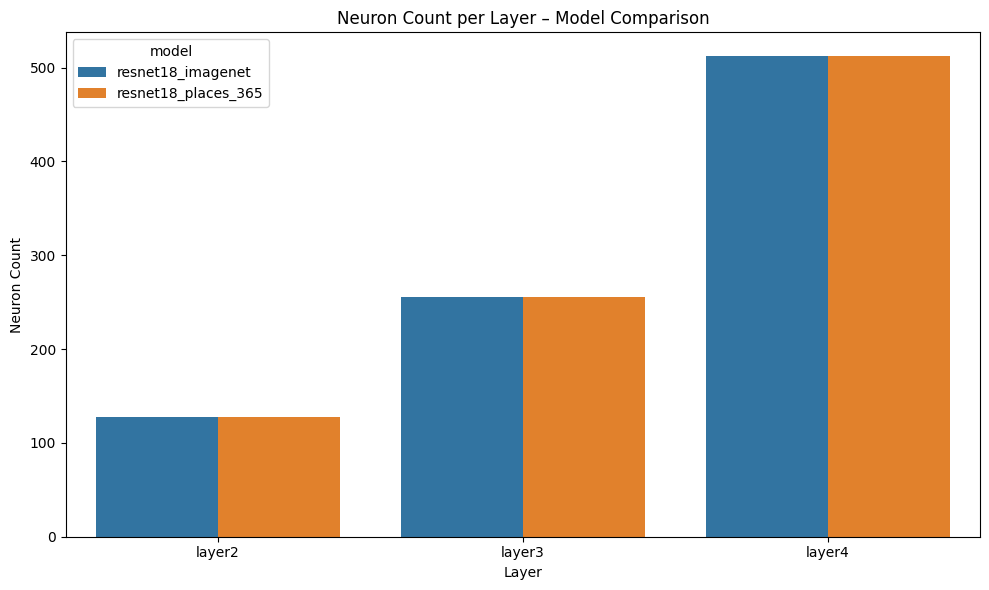

In [81]:
# Neuron Count Per Layer
neurons_per_layer = combined.groupby(['model', 'layer'])['unit'].count().reset_index(name='neuron_count')
plt.figure(figsize=(10, 6))
sns.barplot(data=neurons_per_layer, x='layer', y='neuron_count', hue='model')
plt.title("Neuron Count per Layer – Model Comparison")
plt.ylabel("Neuron Count")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

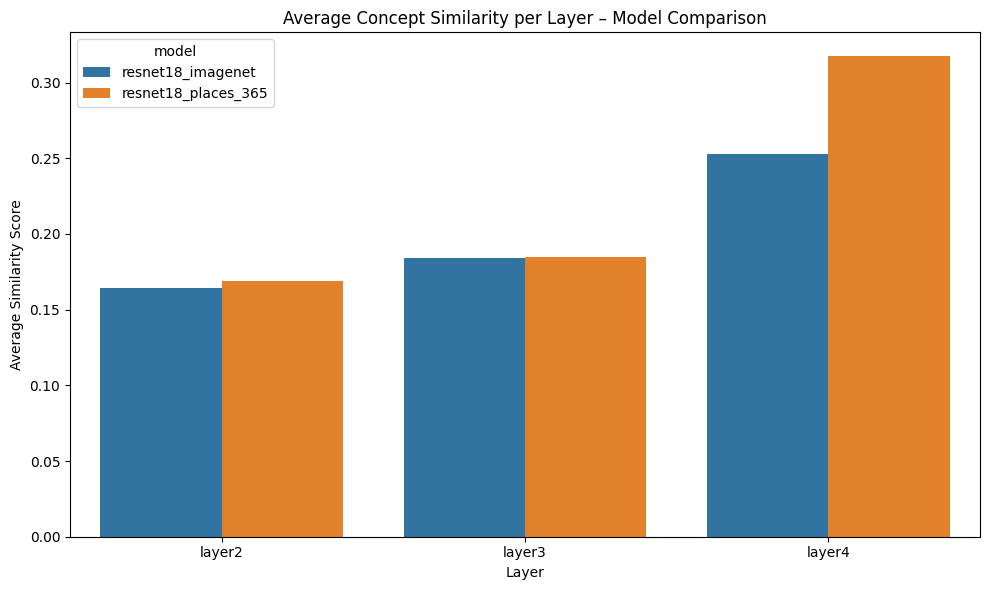

In [82]:
# Average Similarity Per Layer
avg_similarity = combined.groupby(['model', 'layer'])['similarity'].mean().reset_index(name='avg_similarity')
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_similarity, x='layer', y='avg_similarity', hue='model')
plt.title("Average Concept Similarity per Layer – Model Comparison")
plt.ylabel("Average Similarity Score")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

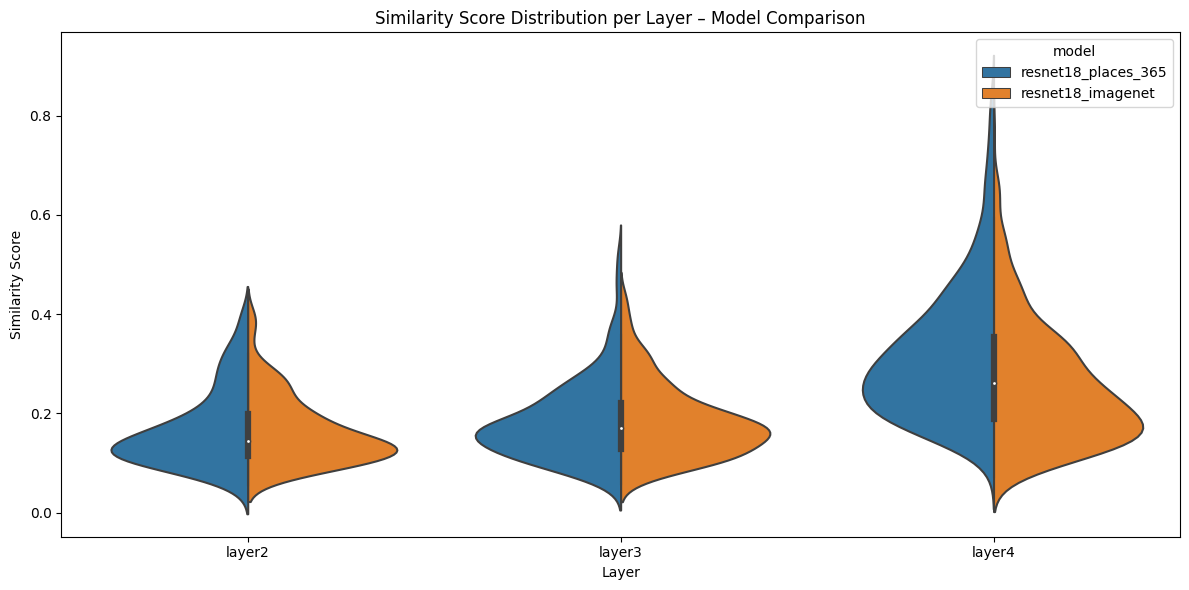

In [84]:
# Violin Plot of Similarity Distribution per Model+Layer
plt.figure(figsize=(12, 6))
sns.violinplot(data=combined, x='layer', y='similarity', hue='model', split=True)
plt.title("Similarity Score Distribution per Layer – Model Comparison")
plt.xlabel("Layer")
plt.ylabel("Similarity Score")
plt.tight_layout()
plt.show()


Jaccard Similarity Scores by Layer:

Layer:  layer2 | Jaccard: 0.3039 | Shared Concepts: 31
Layer:  layer3 | Jaccard: 0.2709 | Shared Concepts: 55
Layer:  layer4 | Jaccard: 0.2333 | Shared Concepts: 112


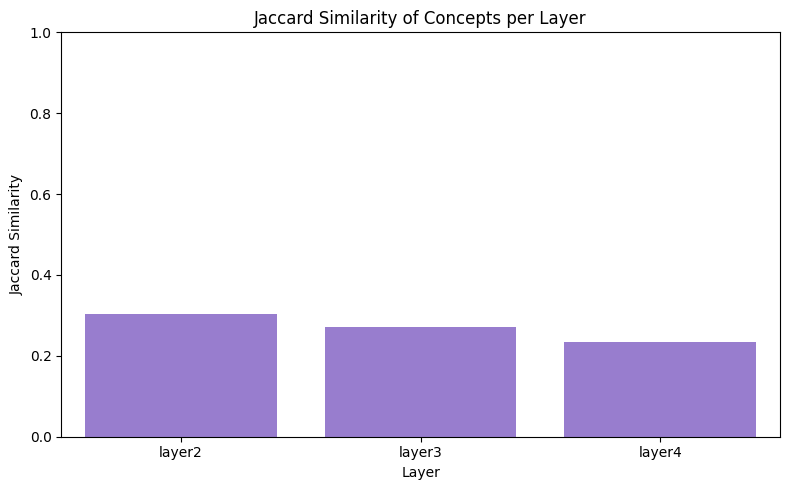

In [92]:
# Get unique layers
layers = sorted(set(df1['layer']).intersection(set(df2['layer'])))

jaccard_scores = []

for layer in layers:
    concepts1 = set(df1[df1['layer'] == layer]['description'])
    concepts2 = set(df2[df2['layer'] == layer]['description'])
    
    intersection = concepts1 & concepts2
    union = concepts1 | concepts2
    
    jaccard = len(intersection) / len(union) if union else 0
    jaccard_scores.append({'layer': layer, 'jaccard_similarity': round(jaccard, 4), 'shared_concepts': len(intersection)})

# Create DataFrame
jaccard_df = pd.DataFrame(jaccard_scores)

# Print similarity scores
print("\nJaccard Similarity Scores by Layer:\n")
for _, row in jaccard_df.iterrows():
    print(f"Layer: {row['layer']:>7} | Jaccard: {row['jaccard_similarity']:.4f} | Shared Concepts: {row['shared_concepts']}")

# Plot Jaccard similarity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=jaccard_df, x='layer', y='jaccard_similarity', color='mediumpurple')
plt.title("Jaccard Similarity of Concepts per Layer")
plt.ylabel("Jaccard Similarity")
plt.xlabel("Layer")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


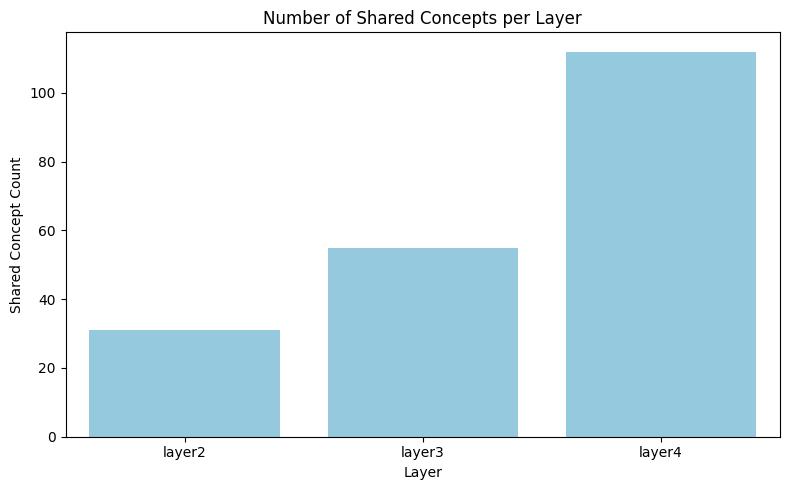

In [87]:
plt.figure(figsize=(8, 5))
sns.barplot(data=jaccard_df, x='layer', y='shared_concepts', color='skyblue')
plt.title("Number of Shared Concepts per Layer")
plt.ylabel("Shared Concept Count")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

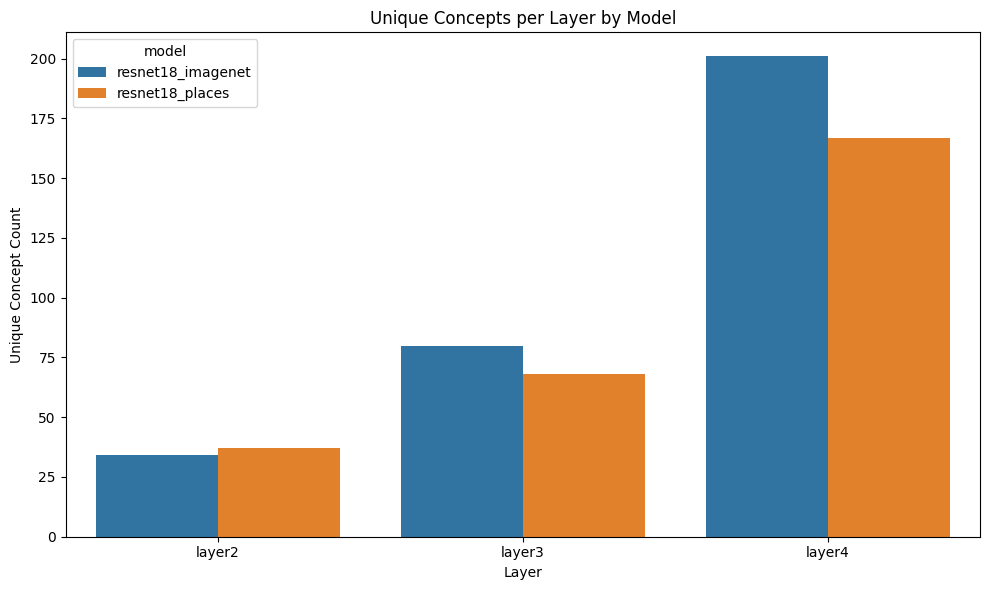

In [88]:
unique_counts = []

for layer in layers:
    c1 = set(df1[df1['layer'] == layer]['description'])
    c2 = set(df2[df2['layer'] == layer]['description'])

    only_1 = c1 - c2
    only_2 = c2 - c1

    unique_counts.append({'layer': layer, 'model': 'resnet18_imagenet', 'unique_concepts': len(only_1)})
    unique_counts.append({'layer': layer, 'model': 'resnet18_places', 'unique_concepts': len(only_2)})

unique_df = pd.DataFrame(unique_counts)

plt.figure(figsize=(10, 6))
sns.barplot(data=unique_df, x='layer', y='unique_concepts', hue='model')
plt.title("Unique Concepts per Layer by Model")
plt.ylabel("Unique Concept Count")
plt.xlabel("Layer")
plt.tight_layout()
plt.show()

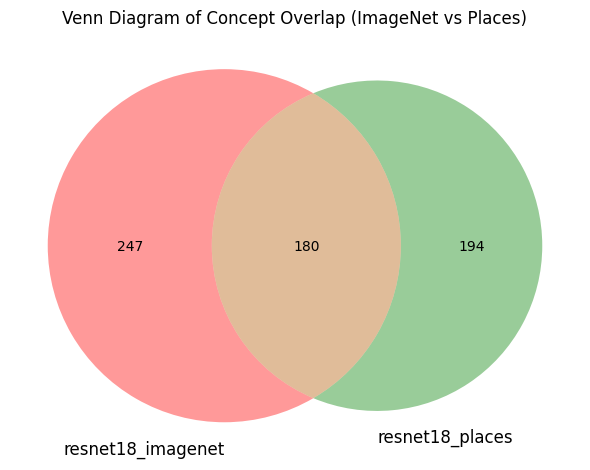

In [89]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Model 1: ImageNet, Model 2: Places
concepts_imagenet = set(df1['description'])
concepts_places = set(df2['description'])

plt.figure(figsize=(6, 6))
venn2([concepts_imagenet, concepts_places], set_labels=('resnet18_imagenet', 'resnet18_places'))
plt.title("Venn Diagram of Concept Overlap (ImageNet vs Places)")
plt.tight_layout()
plt.show()

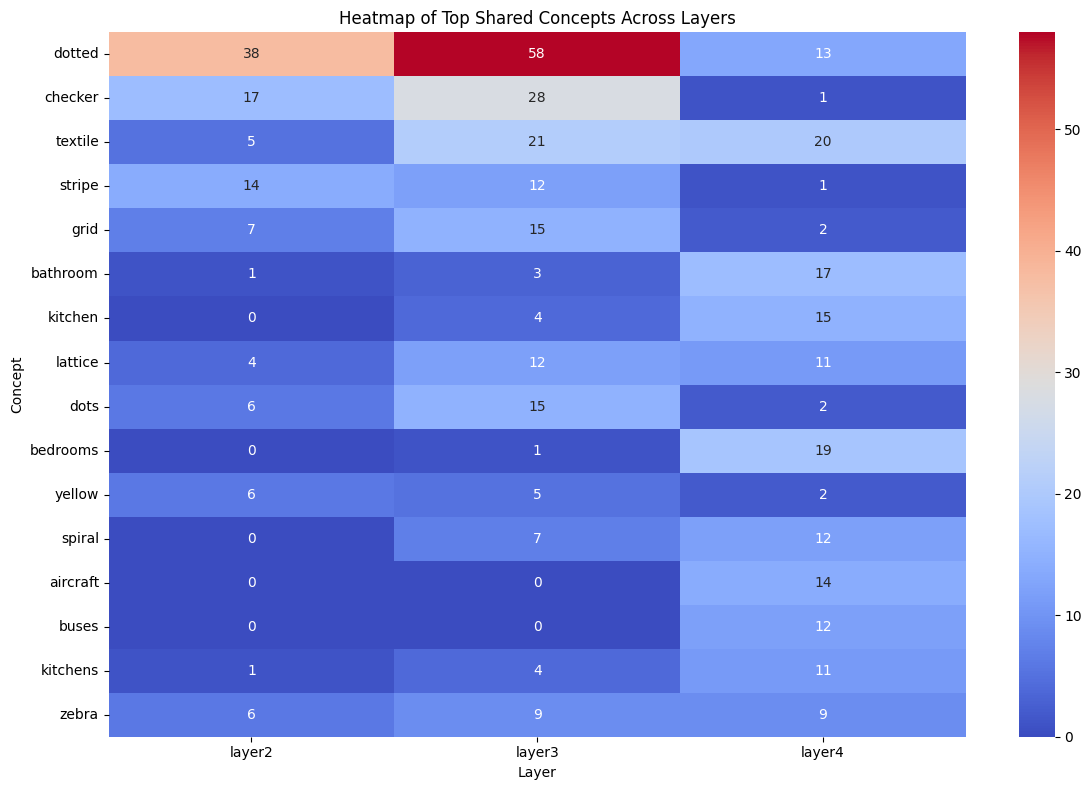

In [90]:
import seaborn as sns

# Pivot tables for both models
pivot_imagenet = df1.pivot_table(index='description', columns='layer', aggfunc='size', fill_value=0)
pivot_places = df2.pivot_table(index='description', columns='layer', aggfunc='size', fill_value=0)

# Select top 20 shared concepts
top_shared = df1['description'].value_counts().head(30).index.intersection(
              df2['description'].value_counts().head(30).index)

# Combine both into a single heatmap table
combined_heatmap = pivot_imagenet.loc[top_shared].add(pivot_places.loc[top_shared], fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(combined_heatmap, cmap='coolwarm', annot=True, fmt='d')
plt.title("Heatmap of Top Shared Concepts Across Layers")
plt.xlabel("Layer")
plt.ylabel("Concept")
plt.tight_layout()
plt.show()


In [91]:
# Sample example neurons from each model
examples_imagenet = df1[['layer', 'unit', 'description', 'similarity']].head(5).copy()
examples_imagenet['model'] = 'resnet18_imagenet'

examples_places = df2[['layer', 'unit', 'description', 'similarity']].head(5).copy()
examples_places['model'] = 'resnet18_places'

# Combine and sort
examples_combined = pd.concat([examples_imagenet, examples_places], ignore_index=True)
examples_combined = examples_combined.sort_values(by=['model', 'layer', 'unit'])

# Print as table
from tabulate import tabulate
print(tabulate(examples_combined, headers='keys', tablefmt='github'))

examples_combined.to_csv("example_neurons_comparison.csv", index=False)


|    | layer   |   unit | description   |   similarity | model             |
|----|---------|--------|---------------|--------------|-------------------|
|  0 | layer2  |      0 | hoodia        |     0.241425 | resnet18_imagenet |
|  1 | layer2  |      1 | lattice       |     0.191895 | resnet18_imagenet |
|  2 | layer2  |      2 | dotted        |     0.173492 | resnet18_imagenet |
|  3 | layer2  |      3 | stripe        |     0.128876 | resnet18_imagenet |
|  4 | layer2  |      4 | stripes       |     0.397461 | resnet18_imagenet |
|  5 | layer2  |      0 | red           |     0.262207 | resnet18_places   |
|  6 | layer2  |      1 | dotted        |     0.21814  | resnet18_places   |
|  7 | layer2  |      2 | tribal        |     0.156525 | resnet18_places   |
|  8 | layer2  |      3 | turquoise     |     0.221619 | resnet18_places   |
|  9 | layer2  |      4 | knots         |     0.123932 | resnet18_places   |
